# Analysis of results for AIFB+ GAE data

**Important note:** something went wrong with saving the IDs and names of the entities, so they cannot be used. Fortunately, these don't have to be used for the two measures I'm using (Rand Index and Silhouette coefficient), as I saved the true labels in every file.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev as std
from scipy import stats
import math
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

## Read in data:

In [2]:
# the reconstruction loss data:
results_filtered_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_1/results.csv")
results_filtered_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_2/results.csv")
results_filtered_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_3/results.csv")
results_filtered_4 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_4/results.csv")
results_filtered_5 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_5/results.csv")
results_filtered_6 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_6/results.csv")
results_filtered_7 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_7/results.csv")
results_filtered_8 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_8/results.csv")
results_filtered_9 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_9/results.csv")
results_filtered_10 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_10/results.csv")

results_alltoone_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_1/results.csv")
results_alltoone_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_2/results.csv")
results_alltoone_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_3/results.csv")
results_alltoone_4 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_4/results.csv")
results_alltoone_5 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_5/results.csv")
results_alltoone_6 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_6/results.csv")
results_alltoone_7 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_7/results.csv")
results_alltoone_8 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_8/results.csv")
results_alltoone_9 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_9/results.csv")
results_alltoone_10 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_10/results.csv")

results_collapsed_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_1/results.csv")
results_collapsed_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_2/results.csv")
results_collapsed_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_3/results.csv")
results_collapsed_4 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_4/results.csv")
results_collapsed_5 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_5/results.csv")
results_collapsed_6 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_6/results.csv")
results_collapsed_7 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_7/results.csv")
results_collapsed_8 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_8/results.csv")
results_collapsed_9 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_9/results.csv")
results_collapsed_10 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_10/results.csv")

results_separate_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_1/results.csv")
results_separate_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_2/results.csv")
results_separate_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_3/results.csv")
results_separate_4 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_4/results.csv")
results_separate_5 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_5/results.csv")
results_separate_6 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_6/results.csv")
results_separate_7 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_7/results.csv")
results_separate_8 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_8/results.csv")
results_separate_9 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_9/results.csv")
results_separate_10 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_10/results.csv")

In [3]:
# the cluster data:
results_filtered_1_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_1/cluster1.csv")
results_filtered_1_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_1/cluster2.csv")
results_filtered_1_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_1/cluster3.csv")

results_filtered_2_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_2/cluster1.csv")
results_filtered_2_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_2/cluster2.csv")
results_filtered_2_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_2/cluster3.csv")

results_filtered_3_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_3/cluster1.csv")
results_filtered_3_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_3/cluster2.csv")
results_filtered_3_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_3/cluster3.csv")

results_filtered_4_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_4/cluster1.csv")
results_filtered_4_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_4/cluster2.csv")
results_filtered_4_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_4/cluster3.csv")

results_filtered_5_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_5/cluster1.csv")
results_filtered_5_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_5/cluster2.csv")
results_filtered_5_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_5/cluster3.csv")

results_filtered_6_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_6/cluster1.csv")
results_filtered_6_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_6/cluster2.csv")
results_filtered_6_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_6/cluster3.csv")

results_filtered_7_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_7/cluster1.csv")
results_filtered_7_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_7/cluster2.csv")
results_filtered_7_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_7/cluster3.csv")

results_filtered_8_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_8/cluster1.csv")
results_filtered_8_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_8/cluster2.csv")
results_filtered_8_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_8/cluster3.csv")

results_filtered_9_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_9/cluster1.csv")
results_filtered_9_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_9/cluster2.csv")
results_filtered_9_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_9/cluster3.csv")

results_filtered_10_1 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_10/cluster1.csv")
results_filtered_10_2 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_10/cluster2.csv")
results_filtered_10_3 = pd.read_csv("../results/GAE/test_aifb_filtered_final/aifb_10/cluster3.csv")

results_all_to_one_1_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_1/cluster1.csv")
results_all_to_one_1_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_1/cluster2.csv")
results_all_to_one_1_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_1/cluster3.csv")

results_all_to_one_2_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_2/cluster1.csv")
results_all_to_one_2_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_2/cluster2.csv")
results_all_to_one_2_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_2/cluster3.csv")

results_all_to_one_3_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_3/cluster1.csv")
results_all_to_one_3_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_3/cluster2.csv")
results_all_to_one_3_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_3/cluster3.csv")

results_all_to_one_4_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_4/cluster1.csv")
results_all_to_one_4_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_4/cluster2.csv")
results_all_to_one_4_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_4/cluster3.csv")

results_all_to_one_5_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_5/cluster1.csv")
results_all_to_one_5_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_5/cluster2.csv")
results_all_to_one_5_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_5/cluster3.csv")

results_all_to_one_6_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_6/cluster1.csv")
results_all_to_one_6_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_6/cluster2.csv")
results_all_to_one_6_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_6/cluster3.csv")

results_all_to_one_7_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_7/cluster1.csv")
results_all_to_one_7_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_7/cluster2.csv")
results_all_to_one_7_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_7/cluster3.csv")

results_all_to_one_8_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_8/cluster1.csv")
results_all_to_one_8_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_8/cluster2.csv")
results_all_to_one_8_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_8/cluster3.csv")

results_all_to_one_9_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_9/cluster1.csv")
results_all_to_one_9_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_9/cluster2.csv")
results_all_to_one_9_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_9/cluster3.csv")

results_all_to_one_10_1 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_10/cluster1.csv")
results_all_to_one_10_2 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_10/cluster2.csv")
results_all_to_one_10_3 = pd.read_csv("../results/GAE/test_aifb_all-to-one_final/aifb_10/cluster3.csv")

results_collapsed_1_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_1/cluster1.csv")
results_collapsed_1_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_1/cluster2.csv")
results_collapsed_1_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_1/cluster3.csv")

results_collapsed_2_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_2/cluster1.csv")
results_collapsed_2_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_2/cluster2.csv")
results_collapsed_2_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_2/cluster3.csv")

results_collapsed_3_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_3/cluster1.csv")
results_collapsed_3_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_3/cluster2.csv")
results_collapsed_3_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_3/cluster3.csv")

results_collapsed_4_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_4/cluster1.csv")
results_collapsed_4_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_4/cluster2.csv")
results_collapsed_4_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_4/cluster3.csv")

results_collapsed_5_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_5/cluster1.csv")
results_collapsed_5_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_5/cluster2.csv")
results_collapsed_5_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_5/cluster3.csv")

results_collapsed_6_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_6/cluster1.csv")
results_collapsed_6_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_6/cluster2.csv")
results_collapsed_6_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_6/cluster3.csv")

results_collapsed_7_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_7/cluster1.csv")
results_collapsed_7_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_7/cluster2.csv")
results_collapsed_7_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_7/cluster3.csv")

results_collapsed_8_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_8/cluster1.csv")
results_collapsed_8_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_8/cluster2.csv")
results_collapsed_8_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_8/cluster3.csv")

results_collapsed_9_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_9/cluster1.csv")
results_collapsed_9_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_9/cluster2.csv")
results_collapsed_9_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_9/cluster3.csv")

results_collapsed_10_1 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_10/cluster1.csv")
results_collapsed_10_2 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_10/cluster2.csv")
results_collapsed_10_3 = pd.read_csv("../results/GAE/test_aifb_collapsed_final/aifb_10/cluster3.csv")

results_separate_1_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_1/cluster1.csv")
results_separate_1_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_1/cluster2.csv")
results_separate_1_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_1/cluster3.csv")

results_separate_2_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_2/cluster1.csv")
results_separate_2_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_2/cluster2.csv")
results_separate_2_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_2/cluster3.csv")

results_separate_3_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_3/cluster1.csv")
results_separate_3_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_3/cluster2.csv")
results_separate_3_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_3/cluster3.csv")

results_separate_4_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_4/cluster1.csv")
results_separate_4_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_4/cluster2.csv")
results_separate_4_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_4/cluster3.csv")

results_separate_5_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_5/cluster1.csv")
results_separate_5_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_5/cluster2.csv")
results_separate_5_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_5/cluster3.csv")

results_separate_6_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_6/cluster1.csv")
results_separate_6_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_6/cluster2.csv")
results_separate_6_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_6/cluster3.csv")

results_separate_7_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_7/cluster1.csv")
results_separate_7_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_7/cluster2.csv")
results_separate_7_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_7/cluster3.csv")

results_separate_8_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_8/cluster1.csv")
results_separate_8_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_8/cluster2.csv")
results_separate_8_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_8/cluster3.csv")

results_separate_9_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_9/cluster1.csv")
results_separate_9_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_9/cluster2.csv")
results_separate_9_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_9/cluster3.csv")

results_separate_10_1 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_10/cluster1.csv")
results_separate_10_2 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_10/cluster2.csv")
results_separate_10_3 = pd.read_csv("../results/GAE/test_aifb_separate_final/aifb_10/cluster3.csv")

## Process data:

In [4]:
# combine the rec loss
rec_loss_filtered = pd.concat([results_filtered_1['ReconLossTrain'], results_filtered_2['ReconLossTrain'], results_filtered_3['ReconLossTrain'], results_filtered_4['ReconLossTrain'], results_filtered_5['ReconLossTrain'],results_filtered_6['ReconLossTrain'], results_filtered_7['ReconLossTrain'], results_filtered_8['ReconLossTrain'], results_filtered_9['ReconLossTrain'], results_filtered_10['ReconLossTrain']],axis=1)
rec_loss_alltoone = pd.concat([results_alltoone_1['ReconLossTrain'], results_alltoone_2['ReconLossTrain'], results_alltoone_3['ReconLossTrain'], results_alltoone_4['ReconLossTrain'], results_alltoone_5['ReconLossTrain'],results_alltoone_6['ReconLossTrain'], results_alltoone_7['ReconLossTrain'], results_alltoone_8['ReconLossTrain'], results_alltoone_9['ReconLossTrain'], results_alltoone_10['ReconLossTrain']],axis=1)
rec_loss_collapsed = pd.concat([results_collapsed_1['ReconLossTrain'], results_collapsed_2['ReconLossTrain'], results_collapsed_3['ReconLossTrain'], results_collapsed_4['ReconLossTrain'], results_collapsed_5['ReconLossTrain'],results_collapsed_6['ReconLossTrain'], results_collapsed_7['ReconLossTrain'], results_collapsed_8['ReconLossTrain'], results_collapsed_9['ReconLossTrain'], results_collapsed_10['ReconLossTrain']],axis=1)
rec_loss_separate = pd.concat([results_separate_1['ReconLossTrain'], results_separate_2['ReconLossTrain'], results_separate_3['ReconLossTrain'], results_separate_4['ReconLossTrain'], results_separate_5['ReconLossTrain'],results_separate_6['ReconLossTrain'], results_separate_7['ReconLossTrain'], results_separate_8['ReconLossTrain'], results_separate_9['ReconLossTrain'], results_separate_10['ReconLossTrain']],axis=1)

# make lists of the final rec loss (in case needed)
final_rec_loss_filtered = [results_filtered_1['ReconLossTrain'].iloc[-1], results_filtered_2['ReconLossTrain'].iloc[-1], results_filtered_3['ReconLossTrain'].iloc[-1], results_filtered_4['ReconLossTrain'].iloc[-1], results_filtered_5['ReconLossTrain'].iloc[-1],results_filtered_6['ReconLossTrain'].iloc[-1], results_filtered_7['ReconLossTrain'].iloc[-1], results_filtered_8['ReconLossTrain'].iloc[-1], results_filtered_9['ReconLossTrain'].iloc[-1], results_filtered_10['ReconLossTrain'].iloc[-1]]
final_rec_loss_alltoone = [results_alltoone_1['ReconLossTrain'].iloc[-1], results_alltoone_2['ReconLossTrain'].iloc[-1], results_alltoone_3['ReconLossTrain'].iloc[-1], results_alltoone_4['ReconLossTrain'].iloc[-1], results_alltoone_5['ReconLossTrain'].iloc[-1],results_alltoone_6['ReconLossTrain'].iloc[-1], results_alltoone_7['ReconLossTrain'].iloc[-1], results_alltoone_8['ReconLossTrain'].iloc[-1], results_alltoone_9['ReconLossTrain'].iloc[-1], results_alltoone_10['ReconLossTrain'].iloc[-1]]
final_rec_loss_collapsed = [results_collapsed_1['ReconLossTrain'].iloc[-1], results_collapsed_2['ReconLossTrain'].iloc[-1], results_collapsed_3['ReconLossTrain'].iloc[-1], results_collapsed_4['ReconLossTrain'].iloc[-1], results_collapsed_5['ReconLossTrain'].iloc[-1],results_collapsed_6['ReconLossTrain'].iloc[-1], results_collapsed_7['ReconLossTrain'].iloc[-1], results_collapsed_8['ReconLossTrain'].iloc[-1], results_collapsed_9['ReconLossTrain'].iloc[-1], results_collapsed_10['ReconLossTrain'].iloc[-1]]
final_rec_loss_separate = [results_separate_1['ReconLossTrain'].iloc[-1], results_separate_2['ReconLossTrain'].iloc[-1], results_separate_3['ReconLossTrain'].iloc[-1], results_separate_4['ReconLossTrain'].iloc[-1], results_separate_5['ReconLossTrain'].iloc[-1],results_separate_6['ReconLossTrain'].iloc[-1], results_separate_7['ReconLossTrain'].iloc[-1], results_separate_8['ReconLossTrain'].iloc[-1], results_separate_9['ReconLossTrain'].iloc[-1], results_separate_10['ReconLossTrain'].iloc[-1]]

mean_rec_loss_filtered = rec_loss_filtered.mean(axis=1)
mean_rec_loss_alltoone = rec_loss_alltoone.mean(axis=1)
mean_rec_loss_collapsed = rec_loss_collapsed.mean(axis=1)
mean_rec_loss_separate = rec_loss_separate.mean(axis=1)

std_rec_loss_filtered = rec_loss_filtered.std(axis=1)
std_rec_loss_alltoone = rec_loss_alltoone.std(axis=1)
std_rec_loss_collapsed = rec_loss_collapsed.std(axis=1)
std_rec_loss_separate = rec_loss_separate.std(axis=1)

## Plot (reconstruction loss):

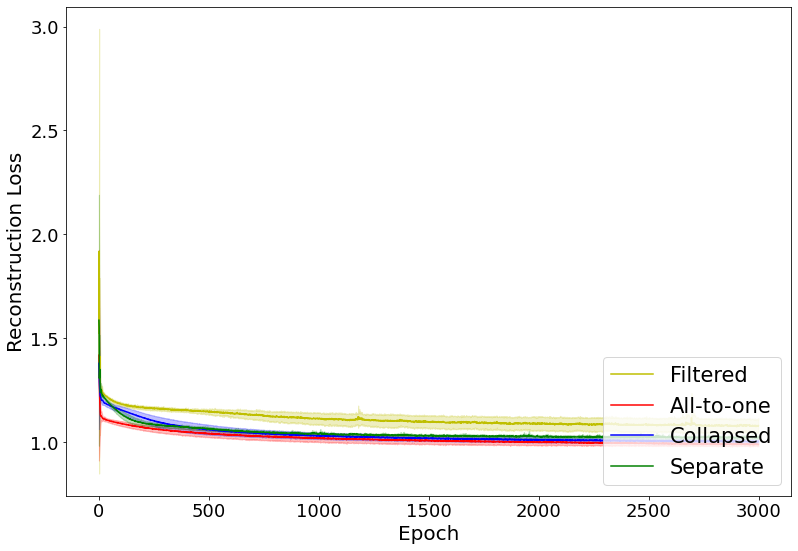

In [5]:
# draw the lines for the means
plt.plot(mean_rec_loss_filtered.index.values, mean_rec_loss_filtered, 'y-', label='Filtered')
plt.plot(mean_rec_loss_alltoone.index.values, mean_rec_loss_alltoone, 'r-', label='All-to-one')
plt.plot(mean_rec_loss_collapsed.index.values, mean_rec_loss_collapsed, 'b-', label='Collapsed')
plt.plot(mean_rec_loss_separate.index.values, mean_rec_loss_separate, 'g-', label='Separate')

# fill between the standard deviations
plt.fill_between(std_rec_loss_filtered.index.values, mean_rec_loss_filtered - std_rec_loss_filtered, mean_rec_loss_filtered + std_rec_loss_filtered, color='y', alpha=0.25)
plt.fill_between(std_rec_loss_alltoone.index.values, mean_rec_loss_alltoone - std_rec_loss_alltoone, mean_rec_loss_alltoone + std_rec_loss_alltoone, color='r', alpha=0.25)
plt.fill_between(std_rec_loss_collapsed.index.values, mean_rec_loss_collapsed - std_rec_loss_collapsed, mean_rec_loss_collapsed + std_rec_loss_collapsed, color='b', alpha=0.25)
plt.fill_between(std_rec_loss_separate.index.values, mean_rec_loss_separate - std_rec_loss_separate, mean_rec_loss_separate + std_rec_loss_separate, color='g', alpha=0.25)

plt.legend(loc="lower right", fontsize=21)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Reconstruction Loss', fontsize=20)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gae_rec_loss.png', dpi=300)

plt.show()

## Calculate metrics:

### Silhouette score:

In [6]:
# filtered:
fil_1_1_sil = silhouette_score(results_filtered_1_1[["X", "Y"]], results_filtered_1_1["Cluster"])
fil_1_2_sil = silhouette_score(results_filtered_1_2[["X", "Y"]], results_filtered_1_2["Cluster"])
fil_1_3_sil = silhouette_score(results_filtered_1_3[["X", "Y"]], results_filtered_1_3["Cluster"])

fil_2_1_sil = silhouette_score(results_filtered_2_1[["X", "Y"]], results_filtered_2_1["Cluster"])
fil_2_2_sil = silhouette_score(results_filtered_2_2[["X", "Y"]], results_filtered_2_2["Cluster"])
fil_2_3_sil = silhouette_score(results_filtered_2_3[["X", "Y"]], results_filtered_2_3["Cluster"])

fil_3_1_sil = silhouette_score(results_filtered_3_1[["X", "Y"]], results_filtered_3_1["Cluster"])
fil_3_2_sil = silhouette_score(results_filtered_3_2[["X", "Y"]], results_filtered_3_2["Cluster"])
fil_3_3_sil = silhouette_score(results_filtered_3_3[["X", "Y"]], results_filtered_3_3["Cluster"])

fil_4_1_sil = silhouette_score(results_filtered_4_1[["X", "Y"]], results_filtered_4_1["Cluster"])
fil_4_2_sil = silhouette_score(results_filtered_4_2[["X", "Y"]], results_filtered_4_2["Cluster"])
fil_4_3_sil = silhouette_score(results_filtered_4_3[["X", "Y"]], results_filtered_4_3["Cluster"])

fil_5_1_sil = silhouette_score(results_filtered_5_1[["X", "Y"]], results_filtered_5_1["Cluster"])
fil_5_2_sil = silhouette_score(results_filtered_5_2[["X", "Y"]], results_filtered_5_2["Cluster"])
fil_5_3_sil = silhouette_score(results_filtered_5_3[["X", "Y"]], results_filtered_5_3["Cluster"])

fil_6_1_sil = silhouette_score(results_filtered_6_1[["X", "Y"]], results_filtered_6_1["Cluster"])
fil_6_2_sil = silhouette_score(results_filtered_6_2[["X", "Y"]], results_filtered_6_2["Cluster"])
fil_6_3_sil = silhouette_score(results_filtered_6_3[["X", "Y"]], results_filtered_6_3["Cluster"])

fil_7_1_sil = silhouette_score(results_filtered_7_1[["X", "Y"]], results_filtered_7_1["Cluster"])
fil_7_2_sil = silhouette_score(results_filtered_7_2[["X", "Y"]], results_filtered_7_2["Cluster"])
fil_7_3_sil = silhouette_score(results_filtered_7_3[["X", "Y"]], results_filtered_7_3["Cluster"])

fil_8_1_sil = silhouette_score(results_filtered_8_1[["X", "Y"]], results_filtered_8_1["Cluster"])
fil_8_2_sil = silhouette_score(results_filtered_8_2[["X", "Y"]], results_filtered_8_2["Cluster"])
fil_8_3_sil = silhouette_score(results_filtered_8_3[["X", "Y"]], results_filtered_8_3["Cluster"])

fil_9_1_sil = silhouette_score(results_filtered_9_1[["X", "Y"]], results_filtered_9_1["Cluster"])
fil_9_2_sil = silhouette_score(results_filtered_9_2[["X", "Y"]], results_filtered_9_2["Cluster"])
fil_9_3_sil = silhouette_score(results_filtered_9_3[["X", "Y"]], results_filtered_9_3["Cluster"])

fil_10_1_sil = silhouette_score(results_filtered_10_1[["X", "Y"]], results_filtered_10_1["Cluster"])
fil_10_2_sil = silhouette_score(results_filtered_10_2[["X", "Y"]], results_filtered_10_2["Cluster"])
fil_10_3_sil = silhouette_score(results_filtered_10_3[["X", "Y"]], results_filtered_10_3["Cluster"])

# all-to-one
ato_1_1_sil = silhouette_score(results_all_to_one_1_1[["X", "Y"]], results_all_to_one_1_1["Cluster"])
ato_1_2_sil = silhouette_score(results_all_to_one_1_2[["X", "Y"]], results_all_to_one_1_2["Cluster"])
ato_1_3_sil = silhouette_score(results_all_to_one_1_3[["X", "Y"]], results_all_to_one_1_3["Cluster"])

ato_2_1_sil = silhouette_score(results_all_to_one_2_1[["X", "Y"]], results_all_to_one_2_1["Cluster"])
ato_2_2_sil = silhouette_score(results_all_to_one_2_2[["X", "Y"]], results_all_to_one_2_2["Cluster"])
ato_2_3_sil = silhouette_score(results_all_to_one_2_3[["X", "Y"]], results_all_to_one_2_3["Cluster"])

ato_3_1_sil = silhouette_score(results_all_to_one_3_1[["X", "Y"]], results_all_to_one_3_1["Cluster"])
ato_3_2_sil = silhouette_score(results_all_to_one_3_2[["X", "Y"]], results_all_to_one_3_2["Cluster"])
ato_3_3_sil = silhouette_score(results_all_to_one_3_3[["X", "Y"]], results_all_to_one_3_3["Cluster"])

ato_4_1_sil = silhouette_score(results_all_to_one_4_1[["X", "Y"]], results_all_to_one_4_1["Cluster"])
ato_4_2_sil = silhouette_score(results_all_to_one_4_2[["X", "Y"]], results_all_to_one_4_2["Cluster"])
ato_4_3_sil = silhouette_score(results_all_to_one_4_3[["X", "Y"]], results_all_to_one_4_3["Cluster"])

ato_5_1_sil = silhouette_score(results_all_to_one_5_1[["X", "Y"]], results_all_to_one_5_1["Cluster"])
ato_5_2_sil = silhouette_score(results_all_to_one_5_2[["X", "Y"]], results_all_to_one_5_2["Cluster"])
ato_5_3_sil = silhouette_score(results_all_to_one_5_3[["X", "Y"]], results_all_to_one_5_3["Cluster"])

ato_6_1_sil = silhouette_score(results_all_to_one_6_1[["X", "Y"]], results_all_to_one_6_1["Cluster"])
ato_6_2_sil = silhouette_score(results_all_to_one_6_2[["X", "Y"]], results_all_to_one_6_2["Cluster"])
ato_6_3_sil = silhouette_score(results_all_to_one_6_3[["X", "Y"]], results_all_to_one_6_3["Cluster"])

ato_7_1_sil = silhouette_score(results_all_to_one_7_1[["X", "Y"]], results_all_to_one_7_1["Cluster"])
ato_7_2_sil = silhouette_score(results_all_to_one_7_2[["X", "Y"]], results_all_to_one_7_2["Cluster"])
ato_7_3_sil = silhouette_score(results_all_to_one_7_3[["X", "Y"]], results_all_to_one_7_3["Cluster"])

ato_8_1_sil = silhouette_score(results_all_to_one_8_1[["X", "Y"]], results_all_to_one_8_1["Cluster"])
ato_8_2_sil = silhouette_score(results_all_to_one_8_2[["X", "Y"]], results_all_to_one_8_2["Cluster"])
ato_8_3_sil = silhouette_score(results_all_to_one_8_3[["X", "Y"]], results_all_to_one_8_3["Cluster"])

ato_9_1_sil = silhouette_score(results_all_to_one_9_1[["X", "Y"]], results_all_to_one_9_1["Cluster"])
ato_9_2_sil = silhouette_score(results_all_to_one_9_2[["X", "Y"]], results_all_to_one_9_2["Cluster"])
ato_9_3_sil = silhouette_score(results_all_to_one_9_3[["X", "Y"]], results_all_to_one_9_3["Cluster"])

ato_10_1_sil = silhouette_score(results_all_to_one_10_1[["X", "Y"]], results_all_to_one_10_1["Cluster"])
ato_10_2_sil = silhouette_score(results_all_to_one_10_2[["X", "Y"]], results_all_to_one_10_2["Cluster"])
ato_10_3_sil = silhouette_score(results_all_to_one_10_3[["X", "Y"]], results_all_to_one_10_3["Cluster"])

# collapsed
col_1_1_sil = silhouette_score(results_collapsed_1_1[["X", "Y"]], results_collapsed_1_1["Cluster"])
col_1_2_sil = silhouette_score(results_collapsed_1_2[["X", "Y"]], results_collapsed_1_2["Cluster"])
col_1_3_sil = silhouette_score(results_collapsed_1_3[["X", "Y"]], results_collapsed_1_3["Cluster"])

col_2_1_sil = silhouette_score(results_collapsed_2_1[["X", "Y"]], results_collapsed_2_1["Cluster"])
col_2_2_sil = silhouette_score(results_collapsed_2_2[["X", "Y"]], results_collapsed_2_2["Cluster"])
col_2_3_sil = silhouette_score(results_collapsed_2_3[["X", "Y"]], results_collapsed_2_3["Cluster"])

col_3_1_sil = silhouette_score(results_collapsed_3_1[["X", "Y"]], results_collapsed_3_1["Cluster"])
col_3_2_sil = silhouette_score(results_collapsed_3_2[["X", "Y"]], results_collapsed_3_2["Cluster"])
col_3_3_sil = silhouette_score(results_collapsed_3_3[["X", "Y"]], results_collapsed_3_3["Cluster"])

col_4_1_sil = silhouette_score(results_collapsed_4_1[["X", "Y"]], results_collapsed_4_1["Cluster"])
col_4_2_sil = silhouette_score(results_collapsed_4_2[["X", "Y"]], results_collapsed_4_2["Cluster"])
col_4_3_sil = silhouette_score(results_collapsed_4_3[["X", "Y"]], results_collapsed_4_3["Cluster"])

col_5_1_sil = silhouette_score(results_collapsed_5_1[["X", "Y"]], results_collapsed_5_1["Cluster"])
col_5_2_sil = silhouette_score(results_collapsed_5_2[["X", "Y"]], results_collapsed_5_2["Cluster"])
col_5_3_sil = silhouette_score(results_collapsed_5_3[["X", "Y"]], results_collapsed_5_3["Cluster"])

col_6_1_sil = silhouette_score(results_collapsed_6_1[["X", "Y"]], results_collapsed_6_1["Cluster"])
col_6_2_sil = silhouette_score(results_collapsed_6_2[["X", "Y"]], results_collapsed_6_2["Cluster"])
col_6_3_sil = silhouette_score(results_collapsed_6_3[["X", "Y"]], results_collapsed_6_3["Cluster"])

col_7_1_sil = silhouette_score(results_collapsed_7_1[["X", "Y"]], results_collapsed_7_1["Cluster"])
col_7_2_sil = silhouette_score(results_collapsed_7_2[["X", "Y"]], results_collapsed_7_2["Cluster"])
col_7_3_sil = silhouette_score(results_collapsed_7_3[["X", "Y"]], results_collapsed_7_3["Cluster"])

col_8_1_sil = silhouette_score(results_collapsed_8_1[["X", "Y"]], results_collapsed_8_1["Cluster"])
col_8_2_sil = silhouette_score(results_collapsed_8_2[["X", "Y"]], results_collapsed_8_2["Cluster"])
col_8_3_sil = silhouette_score(results_collapsed_8_3[["X", "Y"]], results_collapsed_8_3["Cluster"])

col_9_1_sil = silhouette_score(results_collapsed_9_1[["X", "Y"]], results_collapsed_9_1["Cluster"])
col_9_2_sil = silhouette_score(results_collapsed_9_2[["X", "Y"]], results_collapsed_9_2["Cluster"])
col_9_3_sil = silhouette_score(results_collapsed_9_3[["X", "Y"]], results_collapsed_9_3["Cluster"])

col_10_1_sil = silhouette_score(results_collapsed_10_1[["X", "Y"]], results_collapsed_10_1["Cluster"])
col_10_2_sil = silhouette_score(results_collapsed_10_2[["X", "Y"]], results_collapsed_10_2["Cluster"])
col_10_3_sil = silhouette_score(results_collapsed_10_3[["X", "Y"]], results_collapsed_10_3["Cluster"])

# separate
sep_1_1_sil = silhouette_score(results_separate_1_1[["X", "Y"]], results_separate_1_1["Cluster"])
sep_1_2_sil = silhouette_score(results_separate_1_2[["X", "Y"]], results_separate_1_2["Cluster"])
sep_1_3_sil = silhouette_score(results_separate_1_3[["X", "Y"]], results_separate_1_3["Cluster"])

sep_2_1_sil = silhouette_score(results_separate_2_1[["X", "Y"]], results_separate_2_1["Cluster"])
sep_2_2_sil = silhouette_score(results_separate_2_2[["X", "Y"]], results_separate_2_2["Cluster"])
sep_2_3_sil = silhouette_score(results_separate_2_3[["X", "Y"]], results_separate_2_3["Cluster"])

sep_3_1_sil = silhouette_score(results_separate_3_1[["X", "Y"]], results_separate_3_1["Cluster"])
sep_3_2_sil = silhouette_score(results_separate_3_2[["X", "Y"]], results_separate_3_2["Cluster"])
sep_3_3_sil = silhouette_score(results_separate_3_3[["X", "Y"]], results_separate_3_3["Cluster"])

sep_4_1_sil = silhouette_score(results_separate_4_1[["X", "Y"]], results_separate_4_1["Cluster"])
sep_4_2_sil = silhouette_score(results_separate_4_2[["X", "Y"]], results_separate_4_2["Cluster"])
sep_4_3_sil = silhouette_score(results_separate_4_3[["X", "Y"]], results_separate_4_3["Cluster"])

sep_5_1_sil = silhouette_score(results_separate_5_1[["X", "Y"]], results_separate_5_1["Cluster"])
sep_5_2_sil = silhouette_score(results_separate_5_2[["X", "Y"]], results_separate_5_2["Cluster"])
sep_5_3_sil = silhouette_score(results_separate_5_3[["X", "Y"]], results_separate_5_3["Cluster"])

sep_6_1_sil = silhouette_score(results_separate_6_1[["X", "Y"]], results_separate_6_1["Cluster"])
sep_6_2_sil = silhouette_score(results_separate_6_2[["X", "Y"]], results_separate_6_2["Cluster"])
sep_6_3_sil = silhouette_score(results_separate_6_3[["X", "Y"]], results_separate_6_3["Cluster"])

sep_7_1_sil = silhouette_score(results_separate_7_1[["X", "Y"]], results_separate_7_1["Cluster"])
sep_7_2_sil = silhouette_score(results_separate_7_2[["X", "Y"]], results_separate_7_2["Cluster"])
sep_7_3_sil = silhouette_score(results_separate_7_3[["X", "Y"]], results_separate_7_3["Cluster"])

sep_8_1_sil = silhouette_score(results_separate_8_1[["X", "Y"]], results_separate_8_1["Cluster"])
sep_8_2_sil = silhouette_score(results_separate_8_2[["X", "Y"]], results_separate_8_2["Cluster"])
sep_8_3_sil = silhouette_score(results_separate_8_3[["X", "Y"]], results_separate_8_3["Cluster"])

sep_9_1_sil = silhouette_score(results_separate_9_1[["X", "Y"]], results_separate_9_1["Cluster"])
sep_9_2_sil = silhouette_score(results_separate_9_2[["X", "Y"]], results_separate_9_2["Cluster"])
sep_9_3_sil = silhouette_score(results_separate_9_3[["X", "Y"]], results_separate_9_3["Cluster"])

sep_10_1_sil = silhouette_score(results_separate_10_1[["X", "Y"]], results_separate_10_1["Cluster"])
sep_10_2_sil = silhouette_score(results_separate_10_2[["X", "Y"]], results_separate_10_2["Cluster"])
sep_10_3_sil = silhouette_score(results_separate_10_3[["X", "Y"]], results_separate_10_3["Cluster"])

In [7]:
# add these together:
filtered_silhouette = [fil_1_1_sil, fil_1_2_sil, fil_1_3_sil, fil_2_1_sil, fil_2_2_sil, fil_2_3_sil, fil_3_1_sil, fil_3_2_sil, fil_3_3_sil, fil_4_1_sil, fil_4_2_sil, fil_4_3_sil, fil_5_1_sil, fil_5_2_sil, fil_5_3_sil, fil_6_1_sil, fil_6_2_sil, fil_6_3_sil, fil_7_1_sil, fil_7_2_sil, fil_7_3_sil, fil_8_1_sil, fil_8_2_sil, fil_8_3_sil, fil_9_1_sil, fil_9_2_sil, fil_9_3_sil, fil_10_1_sil, fil_10_2_sil, fil_10_3_sil]
alltoone_silhouette = [ato_1_1_sil, ato_1_2_sil, ato_1_3_sil, ato_2_1_sil, ato_2_2_sil, ato_2_3_sil, ato_3_1_sil, ato_3_2_sil, ato_3_3_sil, ato_4_1_sil, ato_4_2_sil, ato_4_3_sil, ato_5_1_sil, ato_5_2_sil, ato_5_3_sil, ato_6_1_sil, ato_6_2_sil, ato_6_3_sil, ato_7_1_sil, ato_7_2_sil, ato_7_3_sil, ato_8_1_sil, ato_8_2_sil, ato_8_3_sil, ato_9_1_sil, ato_9_2_sil, ato_9_3_sil, ato_10_1_sil, ato_10_2_sil, ato_10_3_sil]
collapsed_silhouette = [col_1_1_sil, col_1_2_sil, col_1_3_sil, col_2_1_sil, col_2_2_sil, col_2_3_sil, col_3_1_sil, col_3_2_sil, col_3_3_sil, col_4_1_sil, col_4_2_sil, col_4_3_sil, col_5_1_sil, col_5_2_sil, col_5_3_sil, col_6_1_sil, col_6_2_sil, col_6_3_sil, col_7_1_sil, col_7_2_sil, col_7_3_sil, col_8_1_sil, col_8_2_sil, col_8_3_sil, col_9_1_sil, col_9_2_sil, col_9_3_sil, col_10_1_sil, col_10_2_sil, col_10_3_sil]
separate_silhouette = [sep_1_1_sil, sep_1_2_sil, sep_1_3_sil, sep_2_1_sil, sep_2_2_sil, sep_2_3_sil, sep_3_1_sil, sep_3_2_sil, sep_3_3_sil, sep_4_1_sil, sep_4_2_sil, sep_4_3_sil, sep_5_1_sil, sep_5_2_sil, sep_5_3_sil, sep_6_1_sil, sep_6_2_sil, sep_6_3_sil, sep_7_1_sil, sep_7_2_sil, sep_7_3_sil, sep_8_1_sil, sep_8_2_sil, sep_8_3_sil, sep_9_1_sil, sep_9_2_sil, sep_9_3_sil, sep_10_1_sil, sep_10_2_sil, sep_10_3_sil]

### Rand Index:

In [8]:
# filtered:
fil_1_1_ars = adjusted_rand_score(results_filtered_1_1['TrueLabel'], results_filtered_1_1["Cluster"])
fil_1_2_ars = adjusted_rand_score(results_filtered_1_2['TrueLabel'], results_filtered_1_2["Cluster"])
fil_1_3_ars = adjusted_rand_score(results_filtered_1_3['TrueLabel'], results_filtered_1_3["Cluster"])

fil_2_1_ars = adjusted_rand_score(results_filtered_2_1['TrueLabel'], results_filtered_2_1["Cluster"])
fil_2_2_ars = adjusted_rand_score(results_filtered_2_2['TrueLabel'], results_filtered_2_2["Cluster"])
fil_2_3_ars = adjusted_rand_score(results_filtered_2_3['TrueLabel'], results_filtered_2_3["Cluster"])

fil_3_1_ars = adjusted_rand_score(results_filtered_3_1['TrueLabel'], results_filtered_3_1["Cluster"])
fil_3_2_ars = adjusted_rand_score(results_filtered_3_2['TrueLabel'], results_filtered_3_2["Cluster"])
fil_3_3_ars = adjusted_rand_score(results_filtered_3_3['TrueLabel'], results_filtered_3_3["Cluster"])

fil_4_1_ars = adjusted_rand_score(results_filtered_4_1['TrueLabel'], results_filtered_4_1["Cluster"])
fil_4_2_ars = adjusted_rand_score(results_filtered_4_2['TrueLabel'], results_filtered_4_2["Cluster"])
fil_4_3_ars = adjusted_rand_score(results_filtered_4_3['TrueLabel'], results_filtered_4_3["Cluster"])

fil_5_1_ars = adjusted_rand_score(results_filtered_5_1['TrueLabel'], results_filtered_5_1["Cluster"])
fil_5_2_ars = adjusted_rand_score(results_filtered_5_2['TrueLabel'], results_filtered_5_2["Cluster"])
fil_5_3_ars = adjusted_rand_score(results_filtered_5_3['TrueLabel'], results_filtered_5_3["Cluster"])

fil_6_1_ars = adjusted_rand_score(results_filtered_6_1['TrueLabel'], results_filtered_6_1["Cluster"])
fil_6_2_ars = adjusted_rand_score(results_filtered_6_2['TrueLabel'], results_filtered_6_2["Cluster"])
fil_6_3_ars = adjusted_rand_score(results_filtered_6_3['TrueLabel'], results_filtered_6_3["Cluster"])

fil_7_1_ars = adjusted_rand_score(results_filtered_7_1['TrueLabel'], results_filtered_7_1["Cluster"])
fil_7_2_ars = adjusted_rand_score(results_filtered_7_2['TrueLabel'], results_filtered_7_2["Cluster"])
fil_7_3_ars = adjusted_rand_score(results_filtered_7_3['TrueLabel'], results_filtered_7_3["Cluster"])

fil_8_1_ars = adjusted_rand_score(results_filtered_8_1['TrueLabel'], results_filtered_8_1["Cluster"])
fil_8_2_ars = adjusted_rand_score(results_filtered_8_2['TrueLabel'], results_filtered_8_2["Cluster"])
fil_8_3_ars = adjusted_rand_score(results_filtered_8_3['TrueLabel'], results_filtered_8_3["Cluster"])

fil_9_1_ars = adjusted_rand_score(results_filtered_9_1['TrueLabel'], results_filtered_9_1["Cluster"])
fil_9_2_ars = adjusted_rand_score(results_filtered_9_2['TrueLabel'], results_filtered_9_2["Cluster"])
fil_9_3_ars = adjusted_rand_score(results_filtered_9_3['TrueLabel'], results_filtered_9_3["Cluster"])

fil_10_1_ars = adjusted_rand_score(results_filtered_10_1['TrueLabel'], results_filtered_10_1["Cluster"])
fil_10_2_ars = adjusted_rand_score(results_filtered_10_2['TrueLabel'], results_filtered_10_2["Cluster"])
fil_10_3_ars = adjusted_rand_score(results_filtered_10_3['TrueLabel'], results_filtered_10_3["Cluster"])

# all-to-one
ato_1_1_ars = adjusted_rand_score(results_all_to_one_1_1['TrueLabel'], results_all_to_one_1_1["Cluster"])
ato_1_2_ars = adjusted_rand_score(results_all_to_one_1_2['TrueLabel'], results_all_to_one_1_2["Cluster"])
ato_1_3_ars = adjusted_rand_score(results_all_to_one_1_3['TrueLabel'], results_all_to_one_1_3["Cluster"])

ato_2_1_ars = adjusted_rand_score(results_all_to_one_2_1['TrueLabel'], results_all_to_one_2_1["Cluster"])
ato_2_2_ars = adjusted_rand_score(results_all_to_one_2_2['TrueLabel'], results_all_to_one_2_2["Cluster"])
ato_2_3_ars = adjusted_rand_score(results_all_to_one_2_3['TrueLabel'], results_all_to_one_2_3["Cluster"])

ato_3_1_ars = adjusted_rand_score(results_all_to_one_3_1['TrueLabel'], results_all_to_one_3_1["Cluster"])
ato_3_2_ars = adjusted_rand_score(results_all_to_one_3_2['TrueLabel'], results_all_to_one_3_2["Cluster"])
ato_3_3_ars = adjusted_rand_score(results_all_to_one_3_3['TrueLabel'], results_all_to_one_3_3["Cluster"])

ato_4_1_ars = adjusted_rand_score(results_all_to_one_4_1['TrueLabel'], results_all_to_one_4_1["Cluster"])
ato_4_2_ars = adjusted_rand_score(results_all_to_one_4_2['TrueLabel'], results_all_to_one_4_2["Cluster"])
ato_4_3_ars = adjusted_rand_score(results_all_to_one_4_3['TrueLabel'], results_all_to_one_4_3["Cluster"])

ato_5_1_ars = adjusted_rand_score(results_all_to_one_5_1['TrueLabel'], results_all_to_one_5_1["Cluster"])
ato_5_2_ars = adjusted_rand_score(results_all_to_one_5_2['TrueLabel'], results_all_to_one_5_2["Cluster"])
ato_5_3_ars = adjusted_rand_score(results_all_to_one_5_3['TrueLabel'], results_all_to_one_5_3["Cluster"])

ato_6_1_ars = adjusted_rand_score(results_all_to_one_6_1['TrueLabel'], results_all_to_one_6_1["Cluster"])
ato_6_2_ars = adjusted_rand_score(results_all_to_one_6_2['TrueLabel'], results_all_to_one_6_2["Cluster"])
ato_6_3_ars = adjusted_rand_score(results_all_to_one_6_3['TrueLabel'], results_all_to_one_6_3["Cluster"])

ato_7_1_ars = adjusted_rand_score(results_all_to_one_7_1['TrueLabel'], results_all_to_one_7_1["Cluster"])
ato_7_2_ars = adjusted_rand_score(results_all_to_one_7_2['TrueLabel'], results_all_to_one_7_2["Cluster"])
ato_7_3_ars = adjusted_rand_score(results_all_to_one_7_3['TrueLabel'], results_all_to_one_7_3["Cluster"])

ato_8_1_ars = adjusted_rand_score(results_all_to_one_8_1['TrueLabel'], results_all_to_one_8_1["Cluster"])
ato_8_2_ars = adjusted_rand_score(results_all_to_one_8_2['TrueLabel'], results_all_to_one_8_2["Cluster"])
ato_8_3_ars = adjusted_rand_score(results_all_to_one_8_3['TrueLabel'], results_all_to_one_8_3["Cluster"])

ato_9_1_ars = adjusted_rand_score(results_all_to_one_9_1['TrueLabel'], results_all_to_one_9_1["Cluster"])
ato_9_2_ars = adjusted_rand_score(results_all_to_one_9_2['TrueLabel'], results_all_to_one_9_2["Cluster"])
ato_9_3_ars = adjusted_rand_score(results_all_to_one_9_3['TrueLabel'], results_all_to_one_9_3["Cluster"])

ato_10_1_ars = adjusted_rand_score(results_all_to_one_10_1['TrueLabel'], results_all_to_one_10_1["Cluster"])
ato_10_2_ars = adjusted_rand_score(results_all_to_one_10_2['TrueLabel'], results_all_to_one_10_2["Cluster"])
ato_10_3_ars = adjusted_rand_score(results_all_to_one_10_3['TrueLabel'], results_all_to_one_10_3["Cluster"])

# collapsed
col_1_1_ars = adjusted_rand_score(results_collapsed_1_1['TrueLabel'], results_collapsed_1_1["Cluster"])
col_1_2_ars = adjusted_rand_score(results_collapsed_1_2['TrueLabel'], results_collapsed_1_2["Cluster"])
col_1_3_ars = adjusted_rand_score(results_collapsed_1_3['TrueLabel'], results_collapsed_1_3["Cluster"])

col_2_1_ars = adjusted_rand_score(results_collapsed_2_1['TrueLabel'], results_collapsed_2_1["Cluster"])
col_2_2_ars = adjusted_rand_score(results_collapsed_2_2['TrueLabel'], results_collapsed_2_2["Cluster"])
col_2_3_ars = adjusted_rand_score(results_collapsed_2_3['TrueLabel'], results_collapsed_2_3["Cluster"])

col_3_1_ars = adjusted_rand_score(results_collapsed_3_1['TrueLabel'], results_collapsed_3_1["Cluster"])
col_3_2_ars = adjusted_rand_score(results_collapsed_3_2['TrueLabel'], results_collapsed_3_2["Cluster"])
col_3_3_ars = adjusted_rand_score(results_collapsed_3_3['TrueLabel'], results_collapsed_3_3["Cluster"])

col_4_1_ars = adjusted_rand_score(results_collapsed_4_1['TrueLabel'], results_collapsed_4_1["Cluster"])
col_4_2_ars = adjusted_rand_score(results_collapsed_4_2['TrueLabel'], results_collapsed_4_2["Cluster"])
col_4_3_ars = adjusted_rand_score(results_collapsed_4_3['TrueLabel'], results_collapsed_4_3["Cluster"])

col_5_1_ars = adjusted_rand_score(results_collapsed_5_1['TrueLabel'], results_collapsed_5_1["Cluster"])
col_5_2_ars = adjusted_rand_score(results_collapsed_5_2['TrueLabel'], results_collapsed_5_2["Cluster"])
col_5_3_ars = adjusted_rand_score(results_collapsed_5_3['TrueLabel'], results_collapsed_5_3["Cluster"])

col_6_1_ars = adjusted_rand_score(results_collapsed_6_1['TrueLabel'], results_collapsed_6_1["Cluster"])
col_6_2_ars = adjusted_rand_score(results_collapsed_6_2['TrueLabel'], results_collapsed_6_2["Cluster"])
col_6_3_ars = adjusted_rand_score(results_collapsed_6_3['TrueLabel'], results_collapsed_6_3["Cluster"])

col_7_1_ars = adjusted_rand_score(results_collapsed_7_1['TrueLabel'], results_collapsed_7_1["Cluster"])
col_7_2_ars = adjusted_rand_score(results_collapsed_7_2['TrueLabel'], results_collapsed_7_2["Cluster"])
col_7_3_ars = adjusted_rand_score(results_collapsed_7_3['TrueLabel'], results_collapsed_7_3["Cluster"])

col_8_1_ars = adjusted_rand_score(results_collapsed_8_1['TrueLabel'], results_collapsed_8_1["Cluster"])
col_8_2_ars = adjusted_rand_score(results_collapsed_8_2['TrueLabel'], results_collapsed_8_2["Cluster"])
col_8_3_ars = adjusted_rand_score(results_collapsed_8_3['TrueLabel'], results_collapsed_8_3["Cluster"])

col_9_1_ars = adjusted_rand_score(results_collapsed_9_1['TrueLabel'], results_collapsed_9_1["Cluster"])
col_9_2_ars = adjusted_rand_score(results_collapsed_9_2['TrueLabel'], results_collapsed_9_2["Cluster"])
col_9_3_ars = adjusted_rand_score(results_collapsed_9_3['TrueLabel'], results_collapsed_9_3["Cluster"])

col_10_1_ars = adjusted_rand_score(results_collapsed_10_1['TrueLabel'], results_collapsed_10_1["Cluster"])
col_10_2_ars = adjusted_rand_score(results_collapsed_10_2['TrueLabel'], results_collapsed_10_2["Cluster"])
col_10_3_ars = adjusted_rand_score(results_collapsed_10_3['TrueLabel'], results_collapsed_10_3["Cluster"])

# separate
sep_1_1_ars = adjusted_rand_score(results_separate_1_1['TrueLabel'], results_separate_1_1["Cluster"])
sep_1_2_ars = adjusted_rand_score(results_separate_1_2['TrueLabel'], results_separate_1_2["Cluster"])
sep_1_3_ars = adjusted_rand_score(results_separate_1_3['TrueLabel'], results_separate_1_3["Cluster"])

sep_2_1_ars = adjusted_rand_score(results_separate_2_1['TrueLabel'], results_separate_2_1["Cluster"])
sep_2_2_ars = adjusted_rand_score(results_separate_2_2['TrueLabel'], results_separate_2_2["Cluster"])
sep_2_3_ars = adjusted_rand_score(results_separate_2_3['TrueLabel'], results_separate_2_3["Cluster"])

sep_3_1_ars = adjusted_rand_score(results_separate_3_1['TrueLabel'], results_separate_3_1["Cluster"])
sep_3_2_ars = adjusted_rand_score(results_separate_3_2['TrueLabel'], results_separate_3_2["Cluster"])
sep_3_3_ars = adjusted_rand_score(results_separate_3_3['TrueLabel'], results_separate_3_3["Cluster"])

sep_4_1_ars = adjusted_rand_score(results_separate_4_1['TrueLabel'], results_separate_4_1["Cluster"])
sep_4_2_ars = adjusted_rand_score(results_separate_4_2['TrueLabel'], results_separate_4_2["Cluster"])
sep_4_3_ars = adjusted_rand_score(results_separate_4_3['TrueLabel'], results_separate_4_3["Cluster"])

sep_5_1_ars = adjusted_rand_score(results_separate_5_1['TrueLabel'], results_separate_5_1["Cluster"])
sep_5_2_ars = adjusted_rand_score(results_separate_5_2['TrueLabel'], results_separate_5_2["Cluster"])
sep_5_3_ars = adjusted_rand_score(results_separate_5_3['TrueLabel'], results_separate_5_3["Cluster"])

sep_6_1_ars = adjusted_rand_score(results_separate_6_1['TrueLabel'], results_separate_6_1["Cluster"])
sep_6_2_ars = adjusted_rand_score(results_separate_6_2['TrueLabel'], results_separate_6_2["Cluster"])
sep_6_3_ars = adjusted_rand_score(results_separate_6_3['TrueLabel'], results_separate_6_3["Cluster"])

sep_7_1_ars = adjusted_rand_score(results_separate_7_1['TrueLabel'], results_separate_7_1["Cluster"])
sep_7_2_ars = adjusted_rand_score(results_separate_7_2['TrueLabel'], results_separate_7_2["Cluster"])
sep_7_3_ars = adjusted_rand_score(results_separate_7_3['TrueLabel'], results_separate_7_3["Cluster"])

sep_8_1_ars = adjusted_rand_score(results_separate_8_1['TrueLabel'], results_separate_8_1["Cluster"])
sep_8_2_ars = adjusted_rand_score(results_separate_8_2['TrueLabel'], results_separate_8_2["Cluster"])
sep_8_3_ars = adjusted_rand_score(results_separate_8_3['TrueLabel'], results_separate_8_3["Cluster"])

sep_9_1_ars = adjusted_rand_score(results_separate_9_1['TrueLabel'], results_separate_9_1["Cluster"])
sep_9_2_ars = adjusted_rand_score(results_separate_9_2['TrueLabel'], results_separate_9_2["Cluster"])
sep_9_3_ars = adjusted_rand_score(results_separate_9_3['TrueLabel'], results_separate_9_3["Cluster"])

sep_10_1_ars = adjusted_rand_score(results_separate_10_1['TrueLabel'], results_separate_10_1["Cluster"])
sep_10_2_ars = adjusted_rand_score(results_separate_10_2['TrueLabel'], results_separate_10_2["Cluster"])
sep_10_3_ars = adjusted_rand_score(results_separate_10_3['TrueLabel'], results_separate_10_3["Cluster"])

In [9]:
# add these together:
filtered_adjustedrand = [fil_1_1_ars, fil_1_2_ars, fil_1_3_ars, fil_2_1_ars, fil_2_2_ars, fil_2_3_ars, fil_3_1_ars, fil_3_2_ars, fil_3_3_ars, fil_4_1_ars, fil_4_2_ars, fil_4_3_ars, fil_5_1_ars, fil_5_2_ars, fil_5_3_ars, fil_6_1_ars, fil_6_2_ars, fil_6_3_ars, fil_7_1_ars, fil_7_2_ars, fil_7_3_ars, fil_8_1_ars, fil_8_2_ars, fil_8_3_ars, fil_9_1_ars, fil_9_2_ars, fil_9_3_ars, fil_10_1_ars, fil_10_2_ars, fil_10_3_ars]
alltoone_adjustedrand = [ato_1_1_ars, ato_1_2_ars, ato_1_3_ars, ato_2_1_ars, ato_2_2_ars, ato_2_3_ars, ato_3_1_ars, ato_3_2_ars, ato_3_3_ars, ato_4_1_ars, ato_4_2_ars, ato_4_3_ars, ato_5_1_ars, ato_5_2_ars, ato_5_3_ars, ato_6_1_ars, ato_6_2_ars, ato_6_3_ars, ato_7_1_ars, ato_7_2_ars, ato_7_3_ars, ato_8_1_ars, ato_8_2_ars, ato_8_3_ars, ato_9_1_ars, ato_9_2_ars, ato_9_3_ars, ato_10_1_ars, ato_10_2_ars, ato_10_3_ars]
collapsed_adjustedrand = [col_1_1_ars, col_1_2_ars, col_1_3_ars, col_2_1_ars, col_2_2_ars, col_2_3_ars, col_3_1_ars, col_3_2_ars, col_3_3_ars, col_4_1_ars, col_4_2_ars, col_4_3_ars, col_5_1_ars, col_5_2_ars, col_5_3_ars, col_6_1_ars, col_6_2_ars, col_6_3_ars, col_7_1_ars, col_7_2_ars, col_7_3_ars, col_8_1_ars, col_8_2_ars, col_8_3_ars, col_9_1_ars, col_9_2_ars, col_9_3_ars, col_10_1_ars, col_10_2_ars, col_10_3_ars]
separate_adjustedrand = [sep_1_1_ars, sep_1_2_ars, sep_1_3_ars, sep_2_1_ars, sep_2_2_ars, sep_2_3_ars, sep_3_1_ars, sep_3_2_ars, sep_3_3_ars, sep_4_1_ars, sep_4_2_ars, sep_4_3_ars, sep_5_1_ars, sep_5_2_ars, sep_5_3_ars, sep_6_1_ars, sep_6_2_ars, sep_6_3_ars, sep_7_1_ars, sep_7_2_ars, sep_7_3_ars, sep_8_1_ars, sep_8_2_ars, sep_8_3_ars, sep_9_1_ars, sep_9_2_ars, sep_9_3_ars, sep_10_1_ars, sep_10_2_ars, sep_10_3_ars]

## Plot metrics (boxplot):

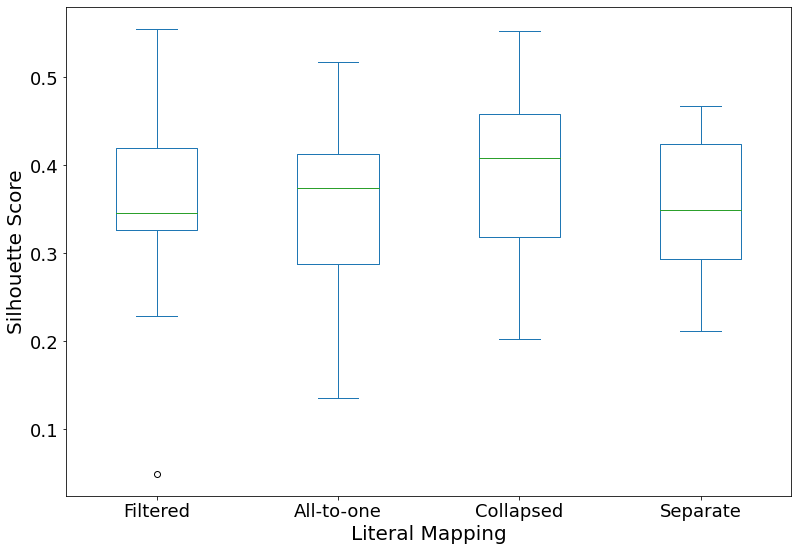

In [10]:
# silhouette
final_sil_all = pd.DataFrame({"Filtered": filtered_silhouette, "All-to-one": alltoone_silhouette, "Collapsed": collapsed_silhouette, "Separate": separate_silhouette})
final_sil_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gae_boxplot_silhouette_score.png', dpi=300)
plt.show()

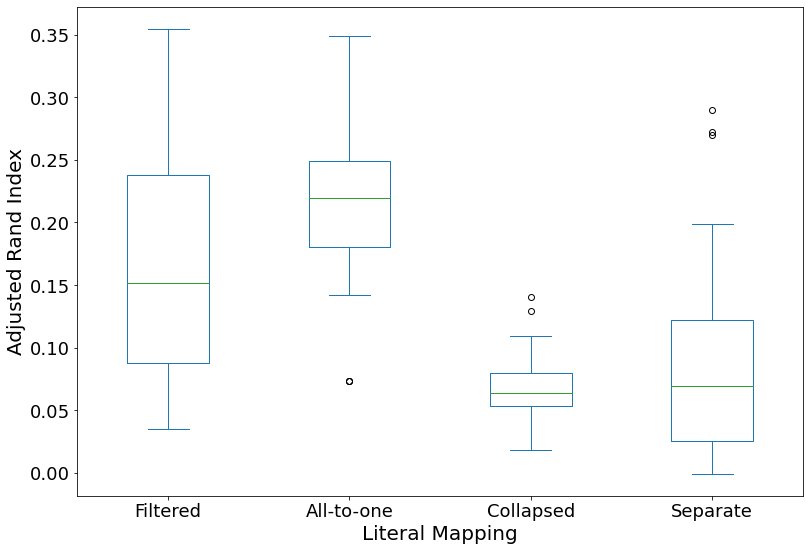

In [11]:
# adjusted rand index
# silhouette
final_adj_all = pd.DataFrame({"Filtered": filtered_adjustedrand, "All-to-one": alltoone_adjustedrand, "Collapsed": collapsed_adjustedrand, "Separate": separate_adjustedrand})
final_adj_all[['Filtered', 'All-to-one', 'Collapsed', "Separate"]].plot(kind='box')

# add x and y labels and change font sizes:
plt.xlabel('Literal Mapping', fontsize=20)
plt.ylabel('Adjusted Rand Index', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)

# increase size of figure
figure = plt.gcf()
figure.set_size_inches(13, 9)

# save the figure
figure.savefig('../plots/experiment_data_analysis/aifb/gae_boxplot_adj_rand_score.png', dpi=300)
plt.show()

## Perform tests on metrics:

In [12]:
# filtered - all-to-one
print("Silhouette Score, Filtered - All-to-one: ", stats.mannwhitneyu(filtered_silhouette, alltoone_silhouette))
print("Adjusted Rand Index, Filtered - All-to-one: ", stats.mannwhitneyu(filtered_adjustedrand, alltoone_adjustedrand))
print()

# filtered - collapsed
print("Silhouette Score, Filtered - Collapsed: ", stats.mannwhitneyu(filtered_silhouette, collapsed_silhouette))
print("Adjusted Rand Index, Filtered - Collapsed: ", stats.mannwhitneyu(filtered_adjustedrand, collapsed_adjustedrand))
print()

# filtered - separate
print("Silhouette Score, Filtered - Separate: ", stats.mannwhitneyu(filtered_silhouette, separate_silhouette))
print("Adjusted Rand Index, Filtered - Separate: ", stats.mannwhitneyu(filtered_adjustedrand, separate_adjustedrand))
print()

# all-to-one - collapsed
print("Silhouette Score, All-to-one - Collapsed: ", stats.mannwhitneyu(alltoone_silhouette, collapsed_silhouette))
print("Adjusted Rand Index, All-to-one - Collapsed: ", stats.mannwhitneyu(alltoone_adjustedrand, collapsed_adjustedrand))
print()

# all-to-one - separate
print("Silhouette Score, All-to-one - Separate: ", stats.mannwhitneyu(alltoone_silhouette, separate_silhouette))
print("Adjusted Rand Index, All-to-one - Separate: ", stats.mannwhitneyu(alltoone_adjustedrand, separate_adjustedrand))
print()
    
# collapsed - separate
print("Silhouette Score, Collapsed - Separate: ", stats.mannwhitneyu(collapsed_silhouette, separate_silhouette))
print("Adjusted Rand Index, Collapsed - Separate: ", stats.mannwhitneyu(collapsed_adjustedrand, separate_adjustedrand))

Silhouette Score, Filtered - All-to-one:  MannwhitneyuResult(statistic=487.0, pvalue=0.5893580561714924)
Adjusted Rand Index, Filtered - All-to-one:  MannwhitneyuResult(statistic=317.0, pvalue=0.05006286886793472)

Silhouette Score, Filtered - Collapsed:  MannwhitneyuResult(statistic=388.0, pvalue=0.36310895566130963)
Adjusted Rand Index, Filtered - Collapsed:  MannwhitneyuResult(statistic=749.0, pvalue=1.0138717939328442e-05)

Silhouette Score, Filtered - Separate:  MannwhitneyuResult(statistic=500.0, pvalue=0.46417358107389584)
Adjusted Rand Index, Filtered - Separate:  MannwhitneyuResult(statistic=670.0, pvalue=0.0011707873559159694)

Silhouette Score, All-to-one - Collapsed:  MannwhitneyuResult(statistic=333.0, pvalue=0.08492605684093447)
Adjusted Rand Index, All-to-one - Collapsed:  MannwhitneyuResult(statistic=867.0, pvalue=7.31281117796142e-10)

Silhouette Score, All-to-one - Separate:  MannwhitneyuResult(statistic=463.0, pvalue=0.8533495045792155)
Adjusted Rand Index, All-to-on